In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from control.matlab import lqr, lsim, ss

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Physical parameters
g = 9.81
l = 3*g/(2*21.5)
m = 3/(0.6*l**2)

In [3]:
# State-space matrices
A = np.array([[0, 1], 
              [3*g/(2*l), 0]])
B = np.array([[0], 
              [3/(m*l**2)]])

C = np.array([[1, 0]])

D = np.array([[0]])

dt = 0.005
tf = 1.25
t = np.arange(0, tf, dt)

Q = np.array([[250, 0],
              [0, 1]])
R = R = np.array([[0.1]])

x0 = [[-.52], [0]]

# Build open-loop model
InvPendSimple = ss(A, B, C, D, 
                   states=['$\\phi$', '$\\dot{\\phi}$'], 
                   inputs=['u'], 
                   outputs=['$\\phi$'])

xe = 0
ue = 0

print("Rank", np.linalg.matrix_rank(ct.ctrb(A, B))) # controllable? Yes! rank is was in the print
print(np.linalg.eig(Q)) # definiteness (all eigenvalues real pos/neg)

Rank 2
EigResult(eigenvalues=array([250.,   1.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


Optimal controller k* = [[97.34778511 18.28913932]]


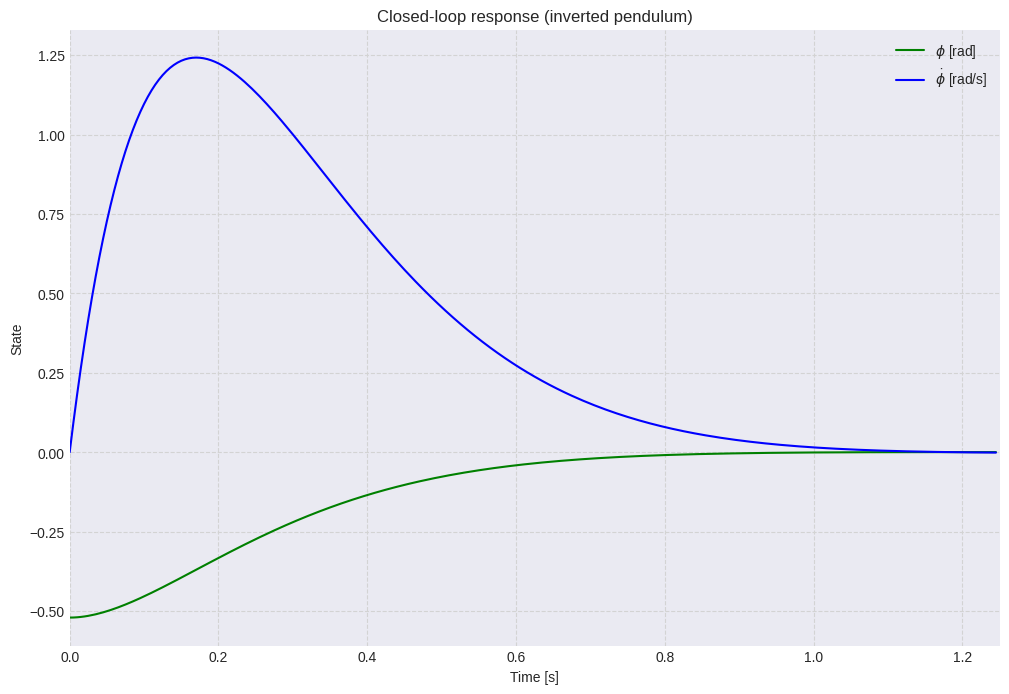

In [4]:
K, P, E = lqr(A, B, Q, R)
print(f"Optimal controller k* = {K}")

A_cl = A - B @ K
B_cl = np.zeros((2, 1))   
C_cl = np.eye(2)
D_cl = np.zeros((2, 1))

LQRClosedLoop = ss(A_cl, B_cl, C_cl, D_cl)

y, t, x = lsim(LQRClosedLoop, np.zeros(len(t)), t, x0)

fig, ax = plt.subplots(1, 1)
ax.set(title='Closed-loop response (inverted pendulum)')
ax.plot(t, y[:, 0], 'g-', label=r'$\phi$ [rad]')
ax.plot(t, x[:, 1], 'b-', label=r'$\dot{\phi}$ [rad/s]')
ax.set(xlabel='Time [s]', ylabel='State', xlim=(0, tf))
ax.grid(color='lightgray', linestyle='--')
ax.legend()
plt.show()